In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
from fastai.vision.all import *
from pathlib import Path


import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [3]:
DATA = Path('/kaggle/input/')
path = DATA/'lyft-udacity-challenge'/'dataB'/'dataB'


dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'CameraRGB'),
    label_func = lambda o: path/'CameraRGB'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)



In [4]:
def get_segmentation(fn): return path/'CameraSeg'/f'{fn.stem}{fn.suffix}'


In [5]:

dls = SegmentationDataLoaders.from_label_func(
    path, bs=4, fnames = get_image_files(path/"CameraRGB"),
    label_func = get_segmentation,
    codes=None
)



In [6]:
learn = unet_learner(dls, resnet34, n_out = 12)
learn.fine_tune(5)
     

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,0.228382,0.173961,02:53


epoch,train_loss,valid_loss,time
0,0.119005,0.107553,02:54
1,0.089564,0.078002,02:54
2,0.124716,0.075707,02:54
3,0.054160,0.055522,02:54
4,0.046628,0.053040,02:54


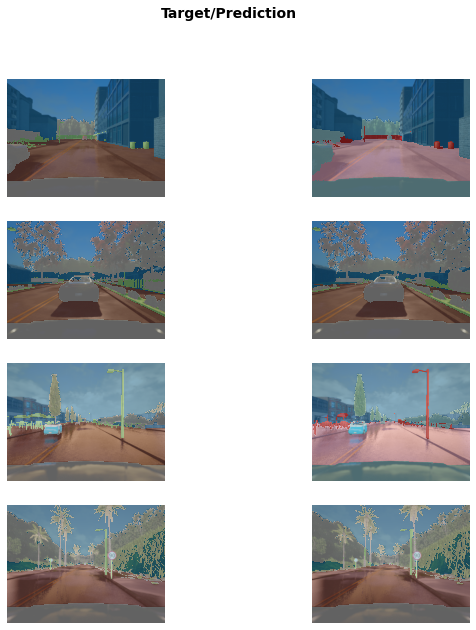

In [7]:
learn.show_results(max_n=6, figsize=(10,10))

In [8]:
learn.path = Path('/kaggle/working/')

In [9]:
learn.export('dashboard_segment.pkl')

In [10]:
#test_img=(DATA/'lyft-udacity-challenge'/'dataC'/'dataC'/'CameraRGB').ls()[0]

In [11]:
#test_pred = learn.predict(test_img)


In [12]:
#test_pred

In [13]:
#from PIL import Image

In [14]:
#pred_mask = test_pred[0]

In [15]:
#pred_b1 = test_pred[1]
#pred_b2 = test_pred[2]

In [16]:
#plt.imshow(pred_mask)

In [17]:
#plt.imshow(pred_b1)

In [18]:
#pred_b2.shape

In [19]:
#pred_arx = pred_b2.argmax(dim=0)

In [20]:
#pred_arx = pred_arx.numpy()

In [21]:
#rescaled = (255.0 / pred_arx.max() * (pred_arx - pred_arx.min())).astype(np.uint8)

In [22]:
#im = Image.fromarray(rescaled)

In [23]:
#im

In [24]:
#load_image(test_img)

In [25]:
#im1 = Image.open(test_img).convert('L')

In [26]:
#im3 = Image.composite(im1, im1, im.convert('1'))

In [27]:
#im3

In [28]:
#mask_im = pred_mask.numpy() 

In [29]:
#mask_rescaled = (255.0 / mask_im .max() * (mask_im - mask_im .min())).astype(np.uint8)

In [30]:
#im = Image.fromarray(mask_rescaled)

In [31]:
#im

In [32]:
#plt.figure(figsize = (10,10))
#plt.imshow(tst_img)
#plt.imshow(pred_mask, alpha=0.5)
#plt.savefig('segmented.png')

In [33]:
#load_image('segmented.png')

In [34]:
#!pip install gradio

In [35]:
#import gradio as gr
#def segment(image):
    
#    pred = learn.predict(image)
#    pred_mask = pred[0]
#    plt.figure(figsize = (10,10))
#    plt.imshow(image)
#    plt.imshow(pred_mask, alpha=0.5)
#    plt.savefig('segmented.png')
#    return load_image('segmented.png')


#gr.Interface(fn=segment, inputs="image", outputs="image").launch(share=True)
